<a href="https://colab.research.google.com/github/Adityasingh675/Supervised-ML-Regression/blob/main/Rossmann_Sales_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>

## <b> Problem Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

# Mount the Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import necessary libraries and files

In [2]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import datetime as dt
import missingno as msno
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
# Import the files

path_rossmann = '/content/drive/MyDrive/Almabetter/Rossmann Sales Prediction - Aditya Singh/data/Rossmann Stores Data.csv'
rossmann_stores_df = pd.read_csv(path_rossmann)

path_store = '/content/drive/MyDrive/Almabetter/Rossmann Sales Prediction - Aditya Singh/data/store.csv'
store_df = pd.read_csv(path_store)

# Check the dataframes

## Checking Rossmann_stores_df

In [4]:
# Print shape of the Rossmann_Stores_df

print('Rossmann_stores_df has {} rows'.format(rossmann_stores_df.shape[0]))
print('Rossmann_stores_df has {} columns'.format(rossmann_stores_df.shape[1]))

Rossmann_stores_df has 1017209 rows
Rossmann_stores_df has 9 columns


In [5]:
# Check info of the dataframe

rossmann_stores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [6]:
# Check head of the dataframe

rossmann_stores_df.head(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
5,6,5,2015-07-31,5651,589,1,1,0,1
6,7,5,2015-07-31,15344,1414,1,1,0,1
7,8,5,2015-07-31,8492,833,1,1,0,1
8,9,5,2015-07-31,8565,687,1,1,0,1
9,10,5,2015-07-31,7185,681,1,1,0,1


In [7]:
# Check tail of the dataframe
rossmann_stores_df.tail(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017199,1106,2,2013-01-01,0,0,0,0,a,1
1017200,1107,2,2013-01-01,0,0,0,0,a,1
1017201,1108,2,2013-01-01,0,0,0,0,a,1
1017202,1109,2,2013-01-01,0,0,0,0,a,1
1017203,1110,2,2013-01-01,0,0,0,0,a,1
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [8]:
# Check description of the dataframe
rossmann_stores_df.describe(include='all')

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
count,1.017209e+06,1.017209e+06,1017209,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1017209,1.017209e+06
unique,NaN,NaN,942,NaN,NaN,NaN,NaN,5,NaN
top,NaN,NaN,2013-08-26,NaN,NaN,NaN,NaN,0,NaN
freq,NaN,NaN,1115,NaN,NaN,NaN,NaN,855087,NaN
mean,5.584297e+02,3.998341e+00,NaN,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,NaN,1.786467e-01
std,3.219087e+02,1.997391e+00,NaN,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,NaN,3.830564e-01
min,1.000000e+00,1.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00
25%,2.800000e+02,2.000000e+00,NaN,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,NaN,0.000000e+00
50%,5.580000e+02,4.000000e+00,NaN,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,NaN,0.000000e+00
75%,8.380000e+02,6.000000e+00,NaN,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,NaN,0.000000e+00


In [9]:
# Check the null values in the dataframe
rossmann_stores_df.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

There are no null values present in the rossmann_stores_df dataframe.

## Checking Store_df

In [10]:
print('Store_df has {} rows'.format(store_df.shape[0]))
print('Store_df has {} columns'.format(store_df.shape[1]))

Store_df has 1115 rows
Store_df has 10 columns


In [11]:
# Check info of the dataframe
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [12]:
# Check head of the dataframe
store_df.head(10)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
7,8,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
8,9,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
9,10,a,a,3160.0,9.0,2009.0,0,NaN,NaN,NaN


In [13]:
# Check tail of the dataframe
store_df.tail(10)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1105,1106,a,c,5330.0,9.0,2011.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1106,1107,a,a,1400.0,6.0,2012.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
1107,1108,a,a,540.0,4.0,2004.0,0,NaN,NaN,NaN
1108,1109,c,a,3490.0,4.0,2011.0,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
1109,1110,c,c,900.0,9.0,2010.0,0,NaN,NaN,NaN
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [14]:
# Check description of the dataframe
store_df.describe(include='all')

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
count,1115.00000,1115,1115,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000,571
unique,NaN,4,3,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,a,a,NaN,NaN,NaN,NaN,NaN,NaN,"Jan,Apr,Jul,Oct"
freq,NaN,602,593,NaN,NaN,NaN,NaN,NaN,NaN,335
mean,558.00000,NaN,NaN,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573,NaN
std,322.01708,NaN,NaN,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935,NaN
min,1.00000,NaN,NaN,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000,NaN
25%,279.50000,NaN,NaN,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000,NaN
50%,558.00000,NaN,NaN,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000,NaN
75%,836.50000,NaN,NaN,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000,NaN


In [15]:
# Check the null values in the dataframe
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

The store_df dataframe has null values in 6 columns which we will address after merging the two dataframes to create the final dataframe.

Merging the two dataframes based on the Store column.

In [16]:
# Merge both the dataframes- (rossmann_stores_df, store_df).
rossmann_df = pd.merge(left=rossmann_stores_df, right=store_df, on='Store', how='left')
rossmann_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


The rossmann_df will be the final dataframe I will be working with mostly through out this project.

I will make a copy of the rossmann_df and will perform all operations on that.

In [17]:
# Create a copy of the final dataframe.
rossmann_df_copy = rossmann_df.copy()

## Checking Rossmann_df_copy

In [18]:
# Check the number of columns and rows of the final dataframe- rossmann_df_copy.
print('Rossmann_df has {} rows'.format(rossmann_df_copy.shape[0]))
print('Rossmann_df has {} columns'.format(rossmann_df_copy.shape[1]))

Rossmann_df has 1017209 rows
Rossmann_df has 18 columns


In [19]:
# Check info of the dataframe.
rossmann_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [20]:
# Check head of the dataframe.
rossmann_df_copy.head(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,5,2015-07-31,5651,589,1,1,0,1,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,5,2015-07-31,15344,1414,1,1,0,1,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
7,8,5,2015-07-31,8492,833,1,1,0,1,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
8,9,5,2015-07-31,8565,687,1,1,0,1,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
9,10,5,2015-07-31,7185,681,1,1,0,1,a,a,3160.0,9.0,2009.0,0,NaN,NaN,NaN


In [21]:
# Check tail of the dataframe.
rossmann_df_copy.tail(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1017199,1106,2,2013-01-01,0,0,0,0,a,1,a,c,5330.0,9.0,2011.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017200,1107,2,2013-01-01,0,0,0,0,a,1,a,a,1400.0,6.0,2012.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
1017201,1108,2,2013-01-01,0,0,0,0,a,1,a,a,540.0,4.0,2004.0,0,NaN,NaN,NaN
1017202,1109,2,2013-01-01,0,0,0,0,a,1,c,a,3490.0,4.0,2011.0,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
1017203,1110,2,2013-01-01,0,0,0,0,a,1,c,c,900.0,9.0,2010.0,0,NaN,NaN,NaN
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1017208,1115,2,2013-01-01,0,0,0,0,a,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [22]:
# Check description of the dataframe.
rossmann_df_copy.describe(include='all')

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
count,1.017209e+06,1.017209e+06,1017209,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1017209,1.017209e+06,1017209,1017209,1.014567e+06,693861.000000,693861.000000,1.017209e+06,509178.000000,509178.000000,509178
unique,NaN,NaN,942,NaN,NaN,NaN,NaN,5,NaN,4,3,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,2013-08-26,NaN,NaN,NaN,NaN,0,NaN,a,a,NaN,NaN,NaN,NaN,NaN,NaN,"Jan,Apr,Jul,Oct"
freq,NaN,NaN,1115,NaN,NaN,NaN,NaN,855087,NaN,551627,537445,NaN,NaN,NaN,NaN,NaN,NaN,293122
mean,5.584297e+02,3.998341e+00,NaN,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,NaN,1.786467e-01,NaN,NaN,5.430086e+03,7.222866,2008.690228,5.005638e-01,23.269093,2011.752774,NaN
std,3.219087e+02,1.997391e+00,NaN,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,NaN,3.830564e-01,NaN,NaN,7.715324e+03,3.211832,5.992644,4.999999e-01,14.095973,1.662870,NaN
min,1.000000e+00,1.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00,NaN,NaN,2.000000e+01,1.000000,1900.000000,0.000000e+00,1.000000,2009.000000,NaN
25%,2.800000e+02,2.000000e+00,NaN,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,NaN,0.000000e+00,NaN,NaN,7.100000e+02,4.000000,2006.000000,0.000000e+00,13.000000,2011.000000,NaN
50%,5.580000e+02,4.000000e+00,NaN,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,NaN,0.000000e+00,NaN,NaN,2.330000e+03,8.000000,2010.000000,1.000000e+00,22.000000,2012.000000,NaN
75%,8.380000e+02,6.000000e+00,NaN,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,NaN,0.000000e+00,NaN,NaN,6.890000e+03,10.000000,2013.000000,1.000000e+00,37.000000,2013.000000,NaN


In [23]:
# Check the null values in the final dataframe.
rossmann_df_copy.isnull().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64

From the above we can see that 6 columns have null values. However, 3 columns contain more than 50% of null values of their total values. I will deal with these null values at a later stage based on the distribution of the data in the particular column.

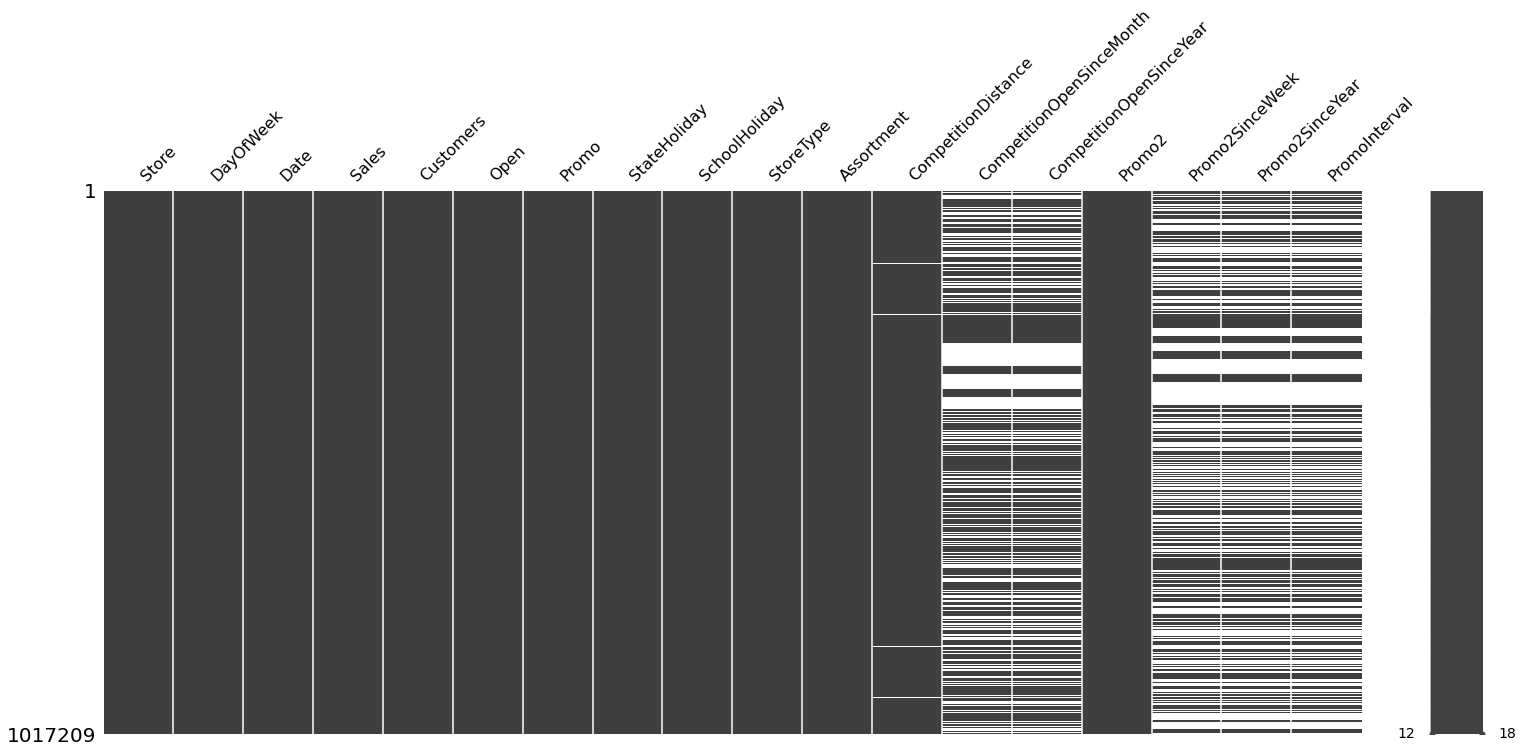

In [24]:
# Visualizing the null values of the dataset.
msno.matrix(rossmann_df_copy)

On visualising the null values of the final dataframe- rossmann_df_copy, we see that barring the CompetitionDistance column, the CompetitionOpenSinceMonth and CompetitionOpenSinceYear have identical missing value patterns as well as the rest three columns Promo2SinceWeek, Promo2SinceYear, PromoInterval have identical patterns among them as well. So, the last 3 columns indicate that there is a high chance that the pattern of the missing values is linked to the Promo2 column.

## Filter the Dataframe

In [25]:
# Check the columns of the dataframe.
rossmann_df_copy.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

As I am to predict the sales of the rossmann stores so the Customer column becomes very important as in the days where customers are 0, the sales of the store will be 0, but the inverse is not true. So, I will focus on the observations having greater than 0 customers for any given day.

In [26]:
# Filter out the observations where Customers are 0.
rossmann_df_final = rossmann_df_copy[(rossmann_df_copy['Customers'] > 0)]

In [27]:
rossmann_df_final['Date'] = rossmann_df_final['Date'].str.replace('-','')
rossmann_df_final['Date'] = pd.to_datetime(rossmann_df_final['Date'].replace(), format= '%Y%m%d')

In [28]:
# Check the count of each unique value in the Promo2 column.
rossmann_df_final.Promo2.value_counts()

0    423293
1    421047
Name: Promo2, dtype: int64

In [29]:
# Check the year since which most stores have started giving Promo2 coupons.
rossmann_df_final.Promo2SinceYear.value_counts()

2011.0    95036
2013.0    91854
2014.0    65757
2012.0    60712
2009.0    53824
2010.0    46412
2015.0     7452
Name: Promo2SinceYear, dtype: int64

From the above we can see that most of the promo2 coupon were started in the year 2011 and 2013.

In [30]:
# Check the counts of various Promo2 promo intervals.
rossmann_df_final['PromoInterval'].value_counts()

Jan,Apr,Jul,Oct     242398
Feb,May,Aug,Nov      97998
Mar,Jun,Sept,Dec     80651
Name: PromoInterval, dtype: int64

From the above we can see that the (Jan, Apr, Jul, Oct) set of months have the highest count of the promo intervals.

In [31]:
# rossmann_df_final_promo2 = rossmann_df_final[rossmann_df_final['Promo2'] == 1]
# rossmann_df_final_promo2

In [32]:
# rossmann_df_final_no_promo2 = rossmann_df_final[rossmann_df_final['Promo2'] == 0]
# rossmann_df_final_no_promo2

In [33]:
# test_df = rossmann_df_final[['Promo2SinceWeek',
#        'Promo2SinceYear', 'PromoInterval']] 

# rossmann_df_final = rossmann_df_final.drop(columns=['Promo2SinceWeek',
#        'Promo2SinceYear', 'PromoInterval'])
rossmann_df_final

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,1,0,a,1,b,a,150.0,9.0,2006.0,0,NaN,NaN,NaN
1016827,733,2,2013-01-01,10765,2377,1,0,a,1,b,b,860.0,10.0,1999.0,0,NaN,NaN,NaN
1016863,769,2,2013-01-01,5035,1248,1,0,a,1,b,b,840.0,NaN,NaN,1,48.0,2012.0,"Jan,Apr,Jul,Oct"
1017042,948,2,2013-01-01,4491,1039,1,0,a,1,b,b,1430.0,NaN,NaN,0,NaN,NaN,NaN


## Null Treatment and Feature Engineering

In [34]:
# Temporarily replace NaN values in Promo2SinceWeek and Promo2SinceYear columns with 0
rossmann_df_final[['Promo2SinceWeek','Promo2SinceYear']] = rossmann_df_final[['Promo2SinceWeek','Promo2SinceYear']].fillna(0)
rossmann_df_final['PromoInterval'] = rossmann_df_final['PromoInterval'].fillna('0')

In [35]:
# Function to create date from week and year 
def get_promo_start_date(week, year):

  from datetime import datetime, timedelta
  if week == 0 or year == 0:
    return '0'  
  else: 
    date = str(year) + '-W' + str(week)
    res = datetime.strptime(date + '-1', "%Y-W%W-%w")
    return res

In [36]:
# Extract promo2 start date into Promo2StatDate column as a string.
rossmann_df_final[['Promo2SinceWeek','Promo2SinceYear']] = rossmann_df_final[['Promo2SinceWeek','Promo2SinceYear']].astype(int)
rossmann_df_final['Promo2StartDate'] = rossmann_df_final.apply(lambda x: get_promo_start_date(x['Promo2SinceWeek'],x['Promo2SinceYear']), axis = 1) 

# Create a subset dataframe of observation where promo2 is running.
promos_df = rossmann_df_final[rossmann_df_final['Promo2'] == 1]
promos_df.head(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Promo2StartDate
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13,2010,"Jan,Apr,Jul,Oct",2010-03-29 00:00:00
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14,2011,"Jan,Apr,Jul,Oct",2011-04-04 00:00:00
10,11,5,2015-07-31,10457,1236,1,1,0,1,a,c,960.0,11.0,2011.0,1,1,2012,"Jan,Apr,Jul,Oct",2012-01-02 00:00:00
11,12,5,2015-07-31,8959,962,1,1,0,1,a,c,1070.0,NaN,NaN,1,13,2010,"Jan,Apr,Jul,Oct",2010-03-29 00:00:00
12,13,5,2015-07-31,8821,568,1,1,0,0,d,a,310.0,NaN,NaN,1,45,2009,"Feb,May,Aug,Nov",2009-11-09 00:00:00


In [37]:
# Create a NumberOfPromos column containing the number of promos run by that particular store in that particular time frame (Promo2StartDate till the latest date).
promos_df['Promo2StartDate'] = pd.to_datetime(promos_df['Promo2StartDate'])
promos_df['Date'] = pd.to_datetime(promos_df['Date'])

promos_df['DurationSincePromoStart'] = promos_df['Date'] - promos_df['Promo2StartDate']

promos_df['DurationSincePromoStart'] = promos_df['DurationSincePromoStart'].apply(lambda x: x if x > timedelta(0) else timedelta(0))
promos_df['DurationSincePromoStart'] = promos_df['DurationSincePromoStart'].astype(str)
promos_df['DurationSincePromoStart'] = promos_df['DurationSincePromoStart'].apply(lambda x: x[:-5])
promos_df['DurationSincePromoStart'] = promos_df['DurationSincePromoStart'].astype(int)
promos_df['NumberOfPromos'] = promos_df['DurationSincePromoStart']*4/365
promos_df['NumberOfPromos'] = promos_df['NumberOfPromos'].astype(int)

# Drop the DurationSincePromoStart column.
promos_df.drop('DurationSincePromoStart', axis = 1, inplace = True)

In [38]:
promos_df.head(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Promo2StartDate,NumberOfPromos
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13,2010,"Jan,Apr,Jul,Oct",2010-03-29,21
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14,2011,"Jan,Apr,Jul,Oct",2011-04-04,17
10,11,5,2015-07-31,10457,1236,1,1,0,1,a,c,960.0,11.0,2011.0,1,1,2012,"Jan,Apr,Jul,Oct",2012-01-02,14
11,12,5,2015-07-31,8959,962,1,1,0,1,a,c,1070.0,NaN,NaN,1,13,2010,"Jan,Apr,Jul,Oct",2010-03-29,21
12,13,5,2015-07-31,8821,568,1,1,0,0,d,a,310.0,NaN,NaN,1,45,2009,"Feb,May,Aug,Nov",2009-11-09,22
13,14,5,2015-07-31,6544,710,1,1,0,1,a,a,1300.0,3.0,2014.0,1,40,2011,"Jan,Apr,Jul,Oct",2011-10-03,15
14,15,5,2015-07-31,9191,766,1,1,0,1,d,c,4110.0,3.0,2010.0,1,14,2011,"Jan,Apr,Jul,Oct",2011-04-04,17
16,17,5,2015-07-31,8430,946,1,1,0,1,a,a,50.0,12.0,2005.0,1,26,2010,"Jan,Apr,Jul,Oct",2010-06-28,20
17,18,5,2015-07-31,10071,936,1,1,0,1,d,c,13840.0,6.0,2010.0,1,14,2012,"Jan,Apr,Jul,Oct",2012-04-02,13
18,19,5,2015-07-31,8234,718,1,1,0,1,a,c,3240.0,NaN,NaN,1,22,2011,"Mar,Jun,Sept,Dec",2011-05-30,16


In [39]:
# Drop the columns Promo2SinceWeek, Promo2SinceYear, Promo2StartDate.
promos_df.drop(['Promo2SinceWeek','Promo2SinceYear','Promo2StartDate'], axis = 1 ,inplace = True)

In [40]:
# Make a dataframe where Promo2 is not equal to 1. 
no_promos_df = rossmann_df_final[rossmann_df_final['Promo2']!=1]
no_promos_df.drop(['Promo2SinceWeek','Promo2SinceYear','Promo2StartDate'], axis = 1 ,inplace = True)
no_promos_df['NumberOfPromos'] = 0

In [41]:
# Join the promos_df and no_promos_df and creating a new dataframe.
rossmann_df_final = pd.concat([promos_df, no_promos_df], ignore_index=True)

In [42]:
# Check the shape of the new dataframe.
rossmann_df_final.shape

(844340, 17)

In [43]:
# Check the head of the new dataframe.
rossmann_df_final.head(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,PromoInterval,NumberOfPromos
0,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,"Jan,Apr,Jul,Oct",21
1,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,"Jan,Apr,Jul,Oct",17
2,11,5,2015-07-31,10457,1236,1,1,0,1,a,c,960.0,11.0,2011.0,1,"Jan,Apr,Jul,Oct",14
3,12,5,2015-07-31,8959,962,1,1,0,1,a,c,1070.0,NaN,NaN,1,"Jan,Apr,Jul,Oct",21
4,13,5,2015-07-31,8821,568,1,1,0,0,d,a,310.0,NaN,NaN,1,"Feb,May,Aug,Nov",22


In [44]:
# Check null values in the dataframe.
rossmann_df_final.isnull().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2186
CompetitionOpenSinceMonth    268602
CompetitionOpenSinceYear     268602
Promo2                            0
PromoInterval                     0
NumberOfPromos                    0
dtype: int64

In [45]:
# Convert Date column to datetime type.
rossmann_df_final['Date'] = pd.to_datetime(rossmann_df_final['Date'])
rossmann_df_final['Date'] = rossmann_df_final.Date.dt.strftime('%Y-%m-%d')

In [46]:
# Using CompetitionOpenSince Month and Year columns to get competition age.

# Substitute 0 for competition distance, open month and year for now. 
rossmann_df_final.fillna(0.0, inplace = True)

rossmann_df_final['CompetitionOpenSinceMonth'] = rossmann_df_final['CompetitionOpenSinceMonth'].astype(int).astype(str)
rossmann_df_final['CompetitionOpenSinceYear'] = rossmann_df_final['CompetitionOpenSinceYear'].astype(int).astype(str)
rossmann_df_final['CompetitionOpenDate'] = rossmann_df_final['CompetitionOpenSinceYear'] + rossmann_df_final['CompetitionOpenSinceMonth'] + '01'

latest_date = str(rossmann_df_final.Date.max()[:10]).replace('-','')

rossmann_df_final.loc[(rossmann_df_final.CompetitionOpenDate == '0001'), 'CompetitionOpenDate'] = latest_date
rossmann_df_final['CompetitionOpenDate'] = pd.to_datetime(rossmann_df_final['CompetitionOpenDate'], format='%Y%m%d')
rossmann_df_final['CompetitionOpenDate'] = pd.to_datetime(rossmann_df_final['CompetitionOpenDate'])

# Get number of days since the competition first opened.
rossmann_df_final['Date'] = pd.to_datetime(rossmann_df_final['Date'])
rossmann_df_final['CompetitionAge'] = rossmann_df_final['Date'] - rossmann_df_final['CompetitionOpenDate']

# Converting timedelta variable competition age to integer.
rossmann_df_final['CompetitionAge'] = rossmann_df_final['CompetitionAge'].astype(str)

rossmann_df_final['CompetitionAge'] = rossmann_df_final['CompetitionAge'].apply(lambda x: x[:-5])
rossmann_df_final['CompetitionAge'] = rossmann_df_final['CompetitionAge'].astype(int)

rossmann_df_final['CompetitionAge'] = rossmann_df_final['CompetitionAge'].apply(lambda x: 0 if x <= 0 else x)

In [47]:
# Drop columns Store, CompetitionOpenSinceMonth, CompetitionOpenSinceYear, CompetitionOpenDate.
rossmann_df_final.drop(['Store','CompetitionOpenSinceMonth','CompetitionOpenSinceYear','CompetitionOpenDate'], axis = 1, inplace = True)

In [48]:
# Check the head of the dataframe.
rossmann_df_final.head(5)

,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,PromoInterval,NumberOfPromos,CompetitionAge
0,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,1,"Jan,Apr,Jul,Oct",21,2829
1,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,1,"Jan,Apr,Jul,Oct",17,3164
2,5,2015-07-31,10457,1236,1,1,0,1,a,c,960.0,1,"Jan,Apr,Jul,Oct",14,1368
3,5,2015-07-31,8959,962,1,1,0,1,a,c,1070.0,1,"Jan,Apr,Jul,Oct",21,0
4,5,2015-07-31,8821,568,1,1,0,0,d,a,310.0,1,"Feb,May,Aug,Nov",22,0


In [49]:
# Make a list of categorical variables.
categorical_cols = []

for col in rossmann_df_final.columns:
  if col not in rossmann_df_final.describe().columns:
    print(col, rossmann_df_final[col].unique())
    categorical_cols.append(col)

Date ['2015-07-31T00:00:00.000000000' '2015-07-30T00:00:00.000000000'
 '2015-07-29T00:00:00.000000000' '2015-07-28T00:00:00.000000000'
 '2015-07-27T00:00:00.000000000' '2015-07-26T00:00:00.000000000'
 '2015-07-25T00:00:00.000000000' '2015-07-24T00:00:00.000000000'
 '2015-07-23T00:00:00.000000000' '2015-07-22T00:00:00.000000000'
 '2015-07-21T00:00:00.000000000' '2015-07-20T00:00:00.000000000'
 '2015-07-19T00:00:00.000000000' '2015-07-18T00:00:00.000000000'
 '2015-07-17T00:00:00.000000000' '2015-07-16T00:00:00.000000000'
 '2015-07-15T00:00:00.000000000' '2015-07-14T00:00:00.000000000'
 '2015-07-13T00:00:00.000000000' '2015-07-12T00:00:00.000000000'
 '2015-07-11T00:00:00.000000000' '2015-07-10T00:00:00.000000000'
 '2015-07-09T00:00:00.000000000' '2015-07-08T00:00:00.000000000'
 '2015-07-07T00:00:00.000000000' '2015-07-06T00:00:00.000000000'
 '2015-07-05T00:00:00.000000000' '2015-07-04T00:00:00.000000000'
 '2015-07-03T00:00:00.000000000' '2015-07-02T00:00:00.000000000'
 '2015-07-01T00:00:0

In [50]:
# Change StateHoliday of type int - 0 to string - 0.
rossmann_df_final.loc[rossmann_df_final.StateHoliday == 0, 'StateHoliday'] = '0'

Since StateHoliday column has two different types of 0 one is string and the other one is integer type, so we merge both of them to a single type having string 0.

In [51]:
# Check head of the dataframe.
rossmann_df_final.head(5)

,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,PromoInterval,NumberOfPromos,CompetitionAge
0,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,1,"Jan,Apr,Jul,Oct",21,2829
1,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,1,"Jan,Apr,Jul,Oct",17,3164
2,5,2015-07-31,10457,1236,1,1,0,1,a,c,960.0,1,"Jan,Apr,Jul,Oct",14,1368
3,5,2015-07-31,8959,962,1,1,0,1,a,c,1070.0,1,"Jan,Apr,Jul,Oct",21,0
4,5,2015-07-31,8821,568,1,1,0,0,d,a,310.0,1,"Feb,May,Aug,Nov",22,0


In [52]:
# Get month name from the date column
rossmann_df_final['Month'] = rossmann_df_final.Date.dt.month_name()

# Get year name from the date column
rossmann_df_final['Year'] = rossmann_df_final.Date.dt.year

# Get day name from the date column
rossmann_df_final['Day'] = rossmann_df_final.Date.dt.day_name()

In [53]:
# Reset the index
rossmann_df_final.reset_index(drop='index', inplace=True)

In [54]:
rossmann_df_final

,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,PromoInterval,NumberOfPromos,CompetitionAge,Month,Year,Day
0,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,1,"Jan,Apr,Jul,Oct",21,2829,July,2015,Friday
1,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,1,"Jan,Apr,Jul,Oct",17,3164,July,2015,Friday
2,5,2015-07-31,10457,1236,1,1,0,1,a,c,960.0,1,"Jan,Apr,Jul,Oct",14,1368,July,2015,Friday
3,5,2015-07-31,8959,962,1,1,0,1,a,c,1070.0,1,"Jan,Apr,Jul,Oct",21,0,July,2015,Friday
4,5,2015-07-31,8821,568,1,1,0,0,d,a,310.0,1,"Feb,May,Aug,Nov",22,0,July,2015,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844335,2,2013-01-01,3821,777,1,0,a,1,b,b,1410.0,0,0,0,1583,January,2013,Tuesday
844336,2,2013-01-01,3375,566,1,0,a,1,b,a,150.0,0,0,0,2314,January,2013,Tuesday
844337,2,2013-01-01,10765,2377,1,0,a,1,b,b,860.0,0,0,0,4841,January,2013,Tuesday
844338,2,2013-01-01,4491,1039,1,0,a,1,b,b,1430.0,0,0,0,0,January,2013,Tuesday


The last three columns Month, Year, Day which I have added is purely for Exploratory Data Analysis purpose.

In [98]:
# Creating a copy of the rossmann_df_final dataframe without handling the Categorical variables in order to fit the Catboost Model.
rossmann_df_final_catboost = rossmann_df_final.copy()

# Drop unnecessary columns which are not required for the analysis.
rossmann_df_final_catboost = rossmann_df_final_catboost.drop(columns=['Date', 'Month', 'Year', 'Day'])

# Move Sales column to the end of the dataframe.
sales_df = rossmann_df_final_catboost['Sales']
rossmann_df_final_catboost = rossmann_df_final_catboost.drop(columns=['Sales'])
rossmann_df_final_catboost = pd.concat([rossmann_df_final_catboost, sales_df], axis=1)

## Exploratory Data Analysis

Correlation Matrix

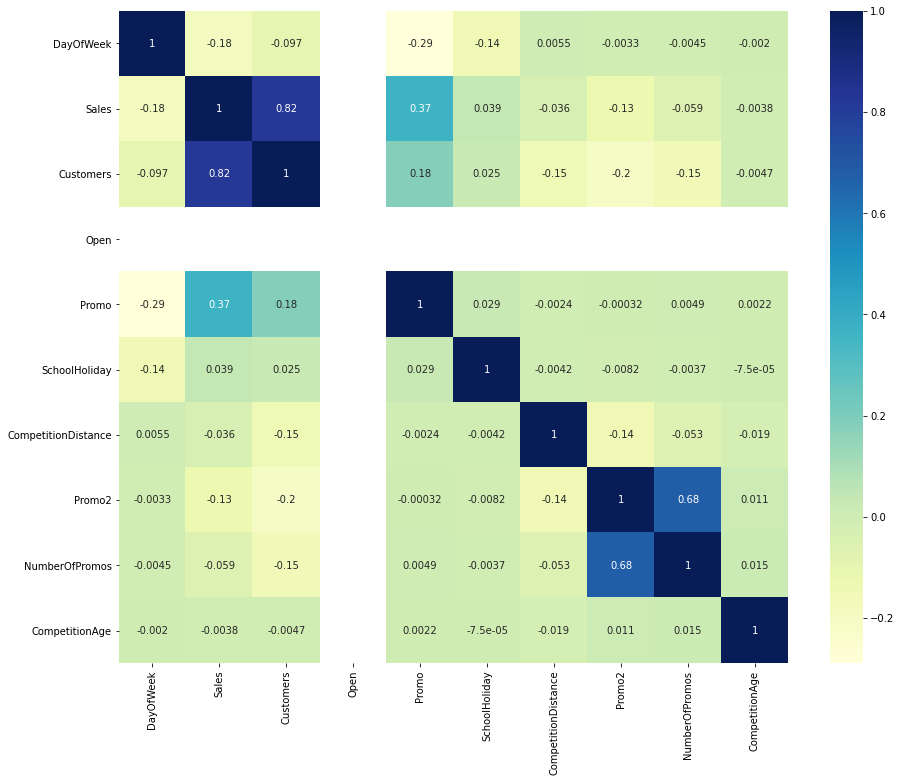

In [56]:
# Drop the Year column for correlation matrix.
rossmann_df_final_corr = rossmann_df_final.drop(columns=['Year'])

# Create a correlation matrix. 
rossmann_df_final_corr = rossmann_df_final_corr.corr()
figure_size = plt.figure(figsize=(15,12))
sns.heatmap(data= rossmann_df_final_corr, cmap='YlGnBu', annot=True)

As we can see from the above that the correlation matrix has blank regarding the Open column, this is maninly because the dataframe we have contains the observations where Open is equal to 1, and because it is a constant number so,
it doesnot varies with respect to other features and hence, covariance become 0. Given, for which the column and row of the correlation matrix are giving NaN values. So, I will remove the Open column from the dataset and then again plot the correlation matrix.

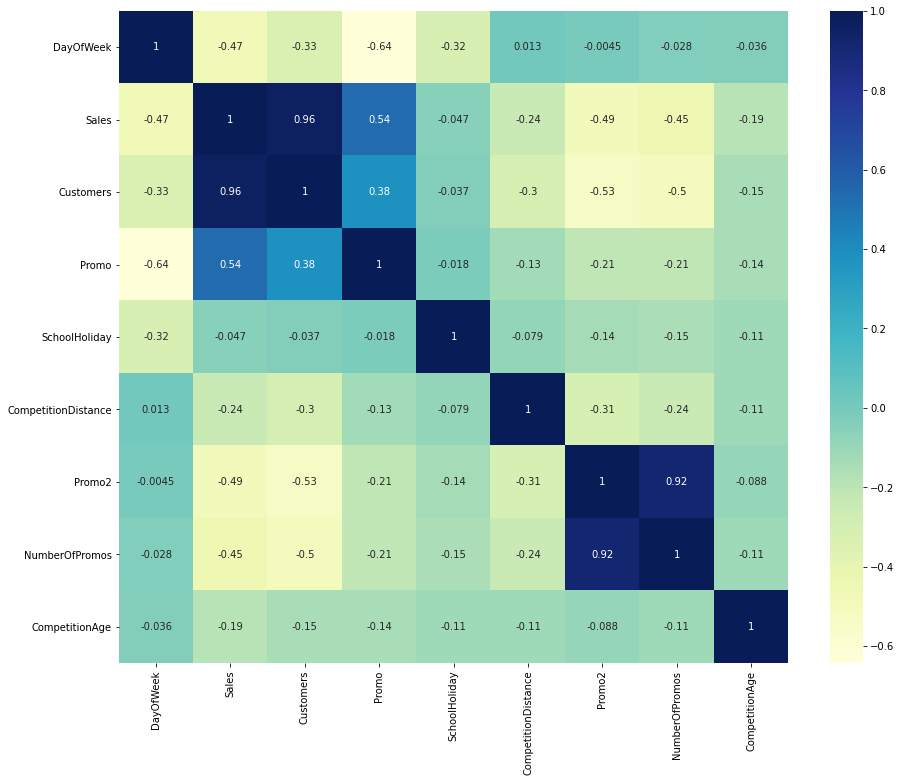

In [57]:
rossmann_df_final_open = rossmann_df_final_corr.drop(columns=['Open'])
rossmann_df_final_open_corr = rossmann_df_final_open.corr()
figure_size = plt.figure(figsize=(15,12))
sns.heatmap(data= rossmann_df_final_open_corr, cmap='YlGnBu', annot=True)

Insights from the above correlation matrix: <br>
  1. Customer column showing high correlation with Promo column.
  2. NumberOfPromos showing high correlation with Promo2 column.
So, we need to deal with these columns and look for solutions to reduce the correlation between them or remove them.   

In [58]:
# Function to create bar plots 
def plot_bars(x, y, color, ci):
  figsize = plt.figure(figsize=(15,10))
  sns.set_style(style='darkgrid')
  sns.barplot(x= x, y= y, palette=color, ci=ci)

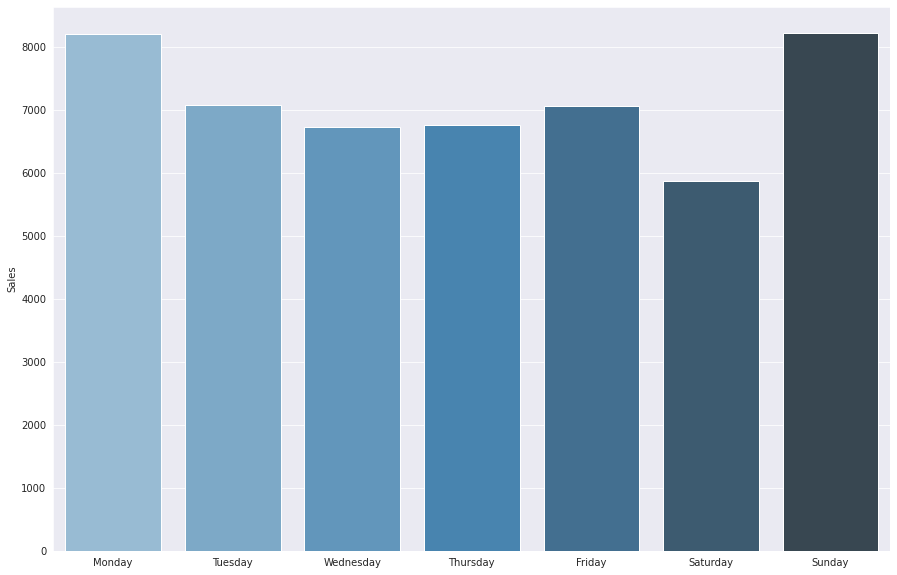

In [59]:
# Bar Plot of average sales against Days.
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plot_bars(x=pd.Categorical(rossmann_df_final['Day'], categories=days, ordered=True), y= rossmann_df_final['Sales'], color="Blues_d", ci=None)

This plot shows the average number of sales day-wise over the course of two years. From the plot shown above we can make some deductions:- <br>
1. We can see that the Sales show a decreasing trend from the start of the week that is Monday till the start of the weekend that is Saturday. 
2. But the sales suddenly pick up and clocks the highest on Sunday.


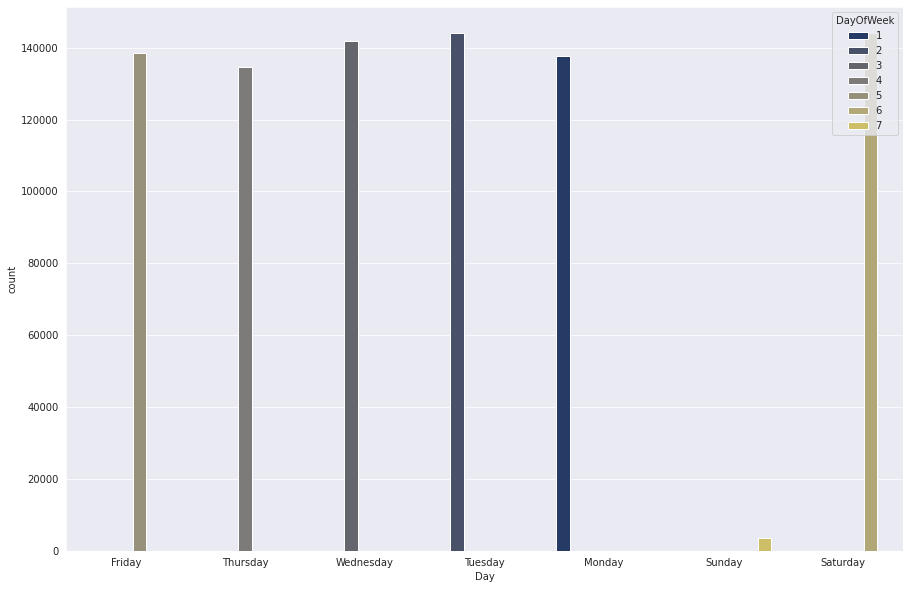

In [60]:
# Count plot of the total number of days the stores were open.
figsize = plt.figure(figsize=(15,10))
sns.countplot(x='Day',hue='DayOfWeek', data=rossmann_df_final, palette="cividis")

The above plot shows why the average sale on Sunday is the highest.
The reason is less number of stores are open on Sunday and suppose the number of sales is good on Sunday but still as the number of stores open in Sunday is significantly less than other days so the average is on the higher side.

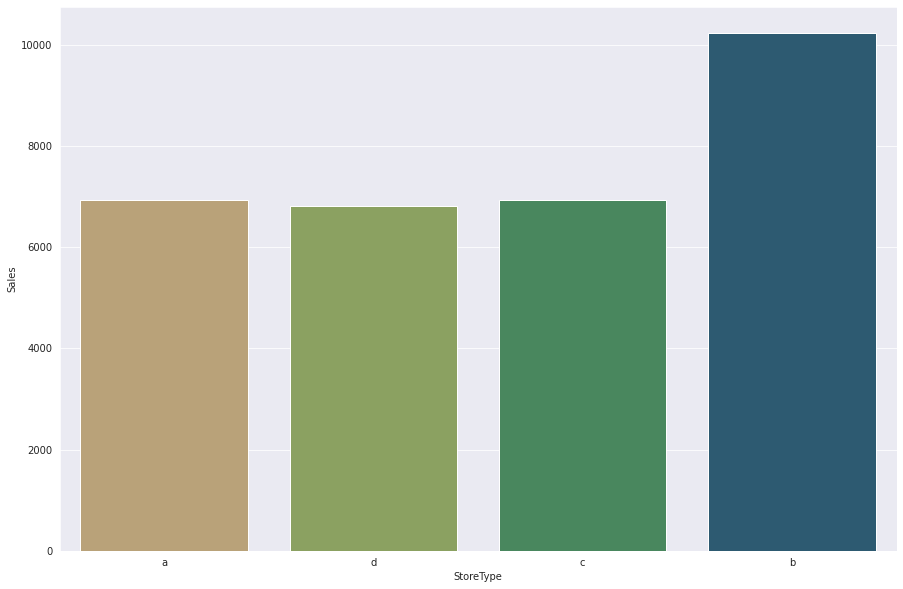

In [61]:
# Bar Plot of average sales against StoreType. 
plot_bars(x= rossmann_df_final['StoreType'], y= rossmann_df_final['Sales'], color="gist_earth_r", ci=None)

From the above plot we can see that ***Store type b*** has the highest average sales when compared to other three types of stores.

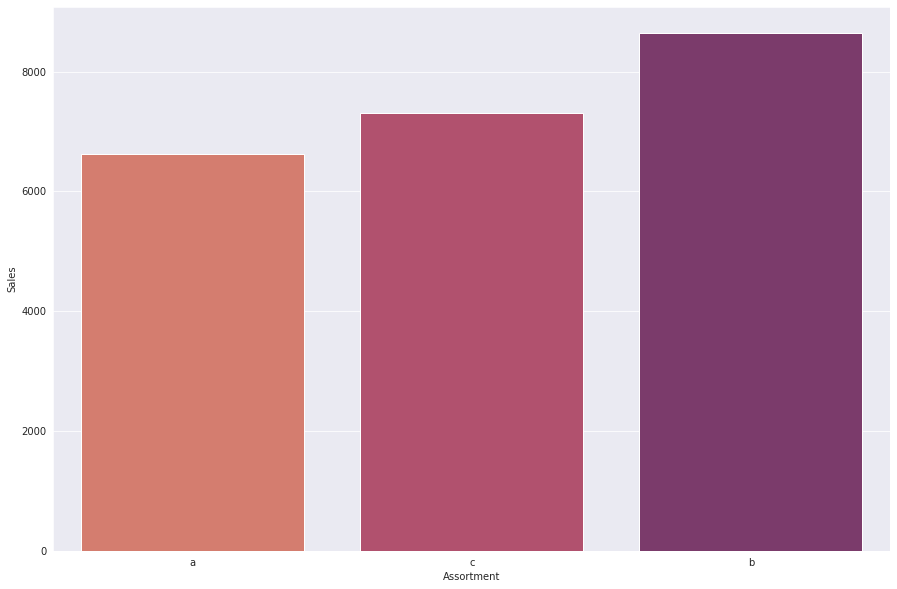

In [62]:
# Bar Plot of average sales against Assortment type. 
plot_bars(rossmann_df_final['Assortment'], y= rossmann_df_final['Sales'], color="flare", ci=None)

This bar graph shows that stores with ***Assortment type b*** have the highest average sale followed by ***type c*** and then ***type a***.

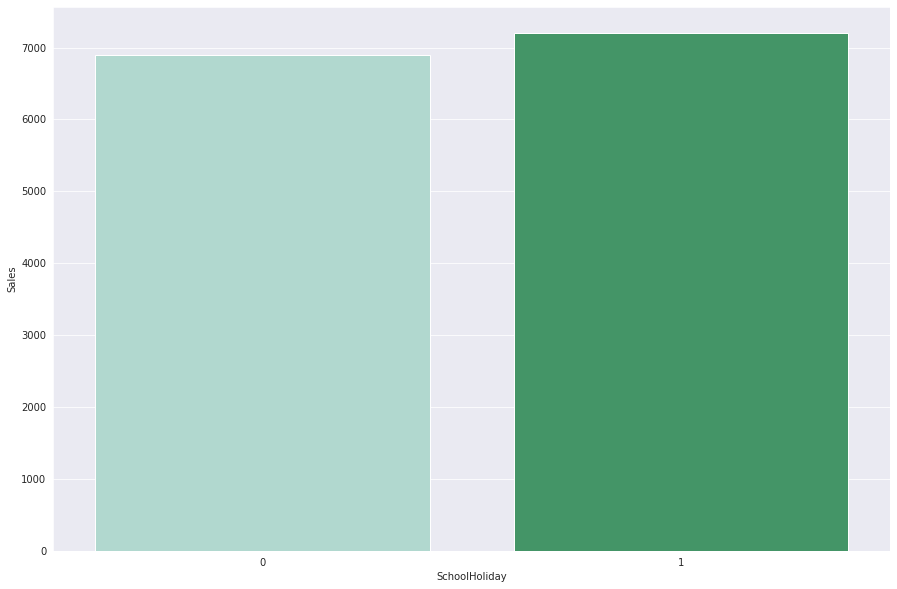

In [63]:
# Bar Plot of average sales against School holiday. 
plot_bars(rossmann_df_final['SchoolHoliday'], y= rossmann_df_final['Sales'], color="BuGn", ci=None)

From this bar plot we can see that whether it is a school holiday or not, it is not affecting the average sales of the stores by much.

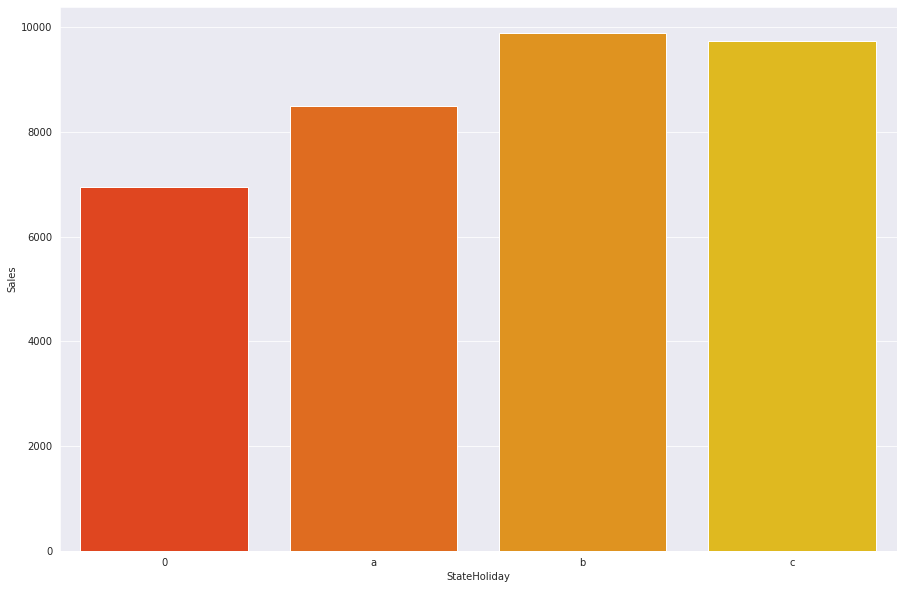

In [64]:
# Bar Plot of average sales against State holiday.
plot_bars(rossmann_df_final['StateHoliday'], y= rossmann_df_final['Sales'], color="autumn", ci=None)

From the above bar plot we can note some interesting observations :- <br>
1. When there is no State holiday, surprisingly the average sales of the stores are the lowest when compared to the holidays.
2. On Easter holiday the average sales of all the stores is the highest, followed closely by sales during the Christmas holiday and then public holidays.


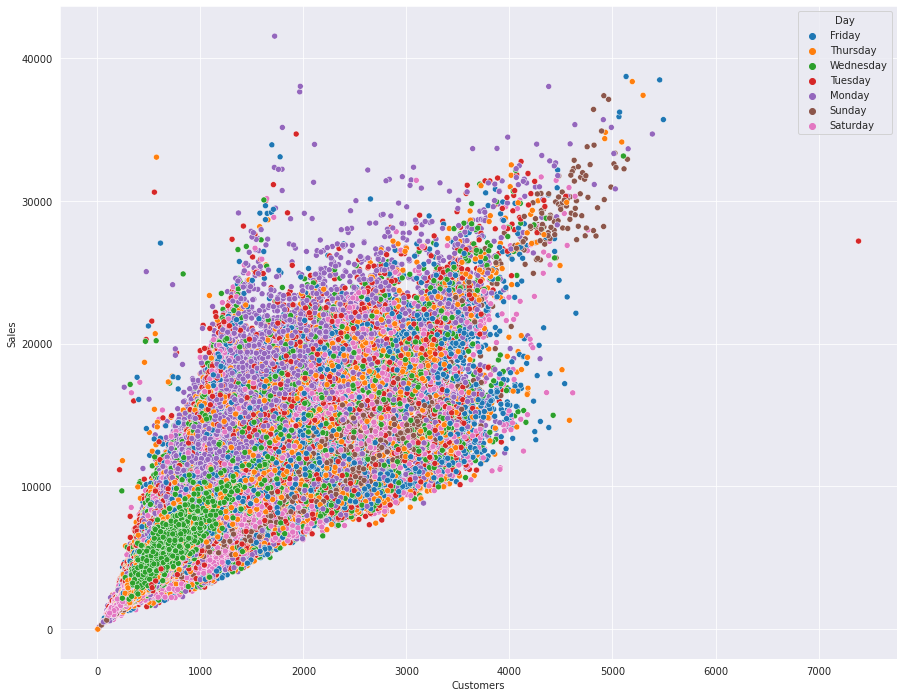

In [65]:
# Scatter plot of Sales with respect to Customers.
figsize = plt.figure(figsize=(15,12))
sns.scatterplot(data= rossmann_df_final, x='Customers', y='Sales', hue='Day')

The scatterplot shows how the Sales of the store varies with respect to the customers based on the days of the week.

From the above scatterplot we can see that one observation from each Monday and Tuesday clearly look as most prominent outliers but to arrive at any particular conclusion regarding the outliers we have to check the distribution of the Sales data.

Let's visualize the dependent variable column - Sales

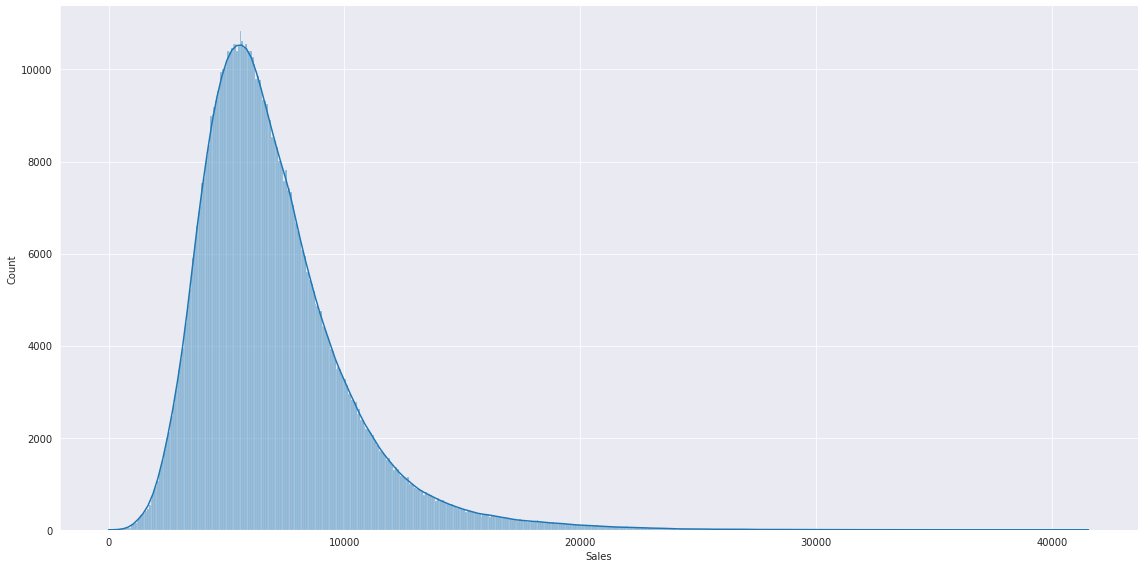

In [96]:
# Visualisation of the Sales column.
sns.displot(rossmann_df_final['Sales'], kde=True, height=8, aspect=2)

The above displot shows that our dependent variable is **right-skewed** (positive skewwed) but the skewness is moderate which can be taken care of by doing a **Square-root transform** of the Sales column. From the above plot we can get some insights as noted below :-      
1. Very small number of samples are above 20000.
2. The Median of the distribution is around 5000.
3. Greater than 95% of samples lie at a range of less than 20000 sales.

In [75]:
# Check skew and kurtosis of the Sales column.
pd.DataFrame(rossmann_df_final['Sales'].agg(['skew', 'kurtosis']).transpose())

,Sales
skew,1.594892
kurtosis,4.853952


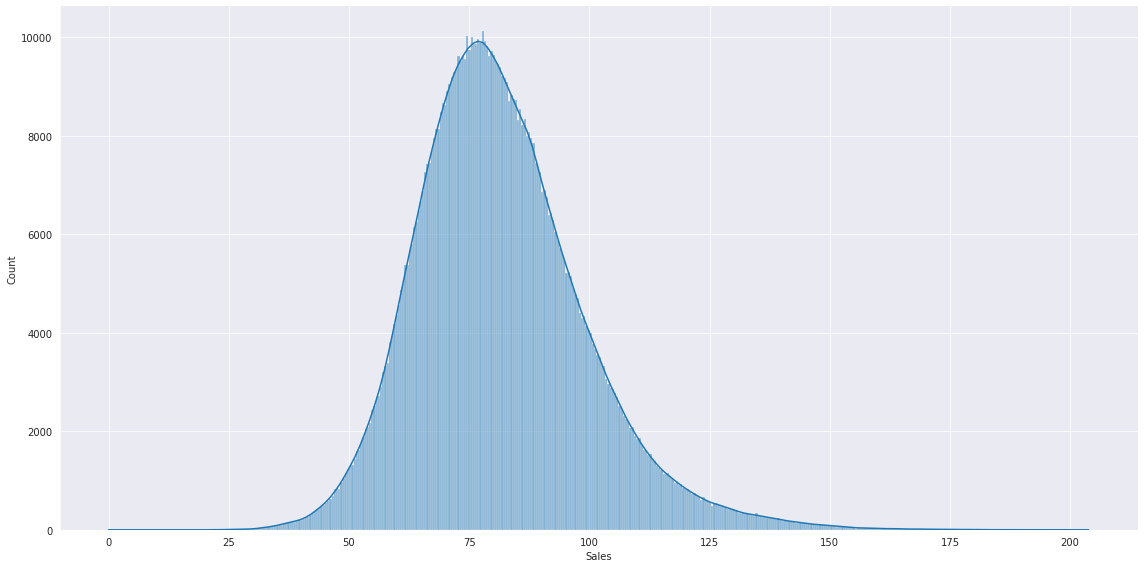

In [97]:
# Apply the Square-root transform on the dependent variable- Sales column.
sns.displot(data=np.sqrt(rossmann_df_final['Sales']), kde=True, height=8, aspect=2)

In [94]:
# Check skew and kurtosis of the Sales column.
pd.DataFrame(np.sqrt(rossmann_df_final['Sales']).agg(['skew', 'kurtosis']).transpose())

,Sales
skew,0.700975
kurtosis,1.271187


As we can see the skewness of the distribution is fixed giving a near perfect normal distribution. Although, there is still a bit of skew in the distribution but it is manageable.

Next, we will look at the outliers in the data.

## Outliers

In [103]:
# Drop the Month, Year and Day columns as they are no longer required.
rossmann_df_final=rossmann_df_final.drop(columns=['Month', 'Year', 'Day'])

# Get the columns having dtypes as object or categorical data.
cat_features = rossmann_df_final.describe(include=['object','category']).columns

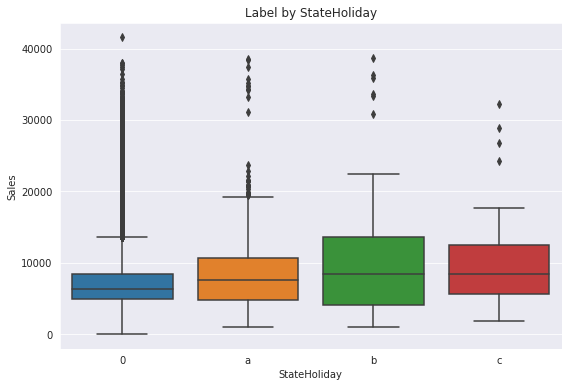

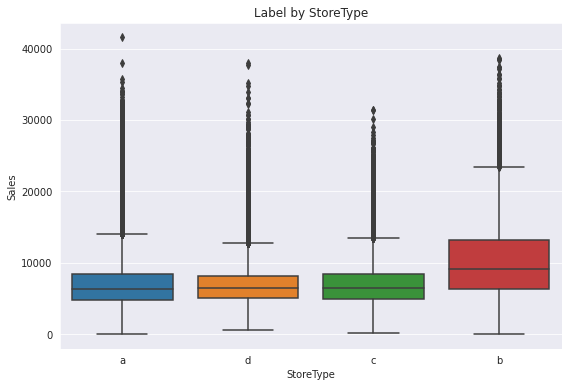

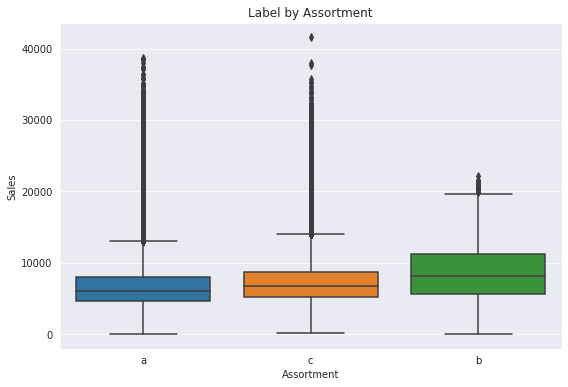

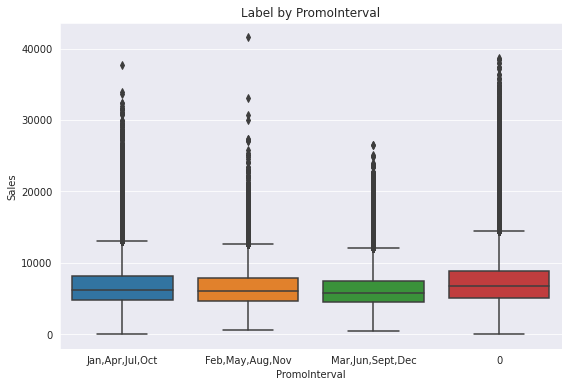

In [105]:
# Box-plot for all the categorical variables to get an idea regarding the outlier distribution.
for col in cat_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    sns.boxplot(y='Sales', x=col, data=rossmann_df_final, ax=ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("Sales")

These box plots show the outliers (Sales) corresponding to the various categories in the data.

Next let's check the percent of outliers in the data with respect to the features.

Most categories have values less than 20000 for sales but some have upto 25000 so, we will assume the sales value above 25000 as outlier. But, there is also a very high chance of the sales figure not being an outlier given the store having a high number of customers and there is also the likelihood of having high number of sales with a bit less number of customers also. So, we will first have a rough check of how many/what percentage of the observations fall into the outlier category.

In [113]:
# Number of observations that may be potential outliers.
len(rossmann_df_final[rossmann_df_final['Sales'] > 25000])

# Percentage of potential outliers in the dataframe.
percent_of_outlier = (len(rossmann_df_final[rossmann_df_final['Sales'] > 25000])/len(rossmann_df_final)) * 100
print('Percent of potential outliers in the data is: {}'.format(percent_of_outlier))

Percent of potential outliers in the data is: 0.08977426155340267


In [ ]:
# def perc_outlier(col_name,):
# percent_of_outliers_a = (len(rossmann_df_final[(rossmann_df_final['StateHoliday'] == 'a') & (rossmann_df_final['Sales'] > 19000)]))/(len(rossmann_df_final[(rossmann_df_final['StateHoliday'] == 'a') & (rossmann_df_final['Sales'] > 0) & (rossmann_df_final['Sales'] < 19000)])) * 100
# percent_of_outliers_0 = (len(rossmann_df_final[(rossmann_df_final['StateHoliday'] == '0') & (rossmann_df_final['Sales'] > 14000)]))/(len(rossmann_df_final[(rossmann_df_final['StateHoliday'] == '0') & (rossmann_df_final['Sales'] > 0) & (rossmann_df_final['Sales'] < 14000)])) * 100
# percent_of_outliers_b = (len(rossmann_df_final[(rossmann_df_final['StateHoliday'] == 'b') & (rossmann_df_final['Sales'] > 22000)]))/(len(rossmann_df_final[(rossmann_df_final['StateHoliday'] == 'b') & (rossmann_df_final['Sales'] > 0) & (rossmann_df_final['Sales'] < 22000)])) * 100
# percent_of_outliers_c = (len(rossmann_df_final[(rossmann_df_final['StateHoliday'] == 'c') & (rossmann_df_final['Sales'] > 17000)]))/(len(rossmann_df_final[(rossmann_df_final['StateHoliday'] == 'c') & (rossmann_df_final['Sales'] > 0) & (rossmann_df_final['Sales'] < 17000)])) * 100